<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Thu Feb  8 15:00:32 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 516.59       Driver Version: 516.59       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   42C    P8     2W /  N/A |      0MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
import torchvision
print(torchvision.__version__)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

2.2.0+cpu
0.17.0+cpu
cpu


## 1. What are 3 areas in industry where computer vision is currently being used?

- Smartphone
- Cars
- Security

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

- Good performance during the train step, but not during the validation step.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

- First, obviously the train-test-split for see if there is overfitting.
- Secondly, regularization such as Ridge or Lasso.
- Finally, Dimension reduction can't prevent overfitting.  
I choose some classics, but I could talk about dropout or auxiliary classifier, utilization of Bagging algorithms...

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [44]:
from torchvision import datasets
from torchvision.transforms import ToTensor

train_dataset = datasets.FashionMNIST(
    root = "data",
    train = True,
    transform=ToTensor(),
    download=False,
    target_transform=None
)

test_dataset = datasets.FashionMNIST(
    root = "data",
    train = False,
    transform=ToTensor(),
    download=False,
    target_transform=None
)
print(len(train_dataset.classes))

10


## 6. Visualize at least 5 different samples of the MNIST training dataset.

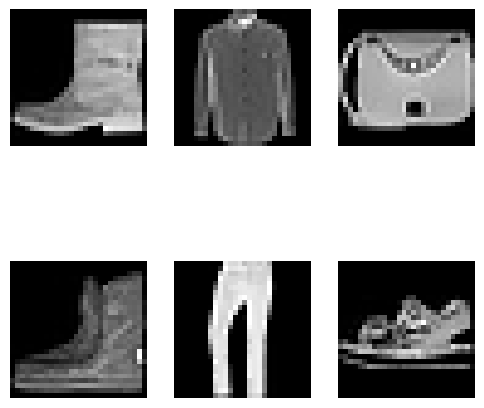

In [30]:
torch.manual_seed(42)
import matplotlib.pyplot as plt

idx = torch.randint(0, len(train_dataset), size=[6])
samples = train_dataset.data[idx]
fig, axs = plt.subplots(2,3,figsize=(6, 6))
index = 0
for i in range(2):
    for j in range(3):
        axs[i,j].imshow(samples[index], cmap = 'gray')
        axs[i,j].axis('off')
        index += 1

plt.show()

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [40]:
from torch.utils.data import DataLoader

train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=32,
    shuffle = True,
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=32,
    shuffle=False
)

In [42]:
value_, label_ = next(iter(train_loader))
value_.shape, label_.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [60]:
from torch import nn
class TinyVGG(nn.Module):

    def __init__(self, filters : int = 10, kernel_size : int = 3, stride : int = 1, padding : int = 1) -> None:
        super(TinyVGG, self).__init__()
        __conv_hparams = [filters, kernel_size, stride, padding] 
        self.block1 = nn.Sequential(
            nn.Conv2d(1, *__conv_hparams),  # 28 + 2 - 3 + 1 = 28
            nn.ReLU(),
            nn.Conv2d(filters, *__conv_hparams), # 28
            nn.ReLU(),
            nn.MaxPool2d(2) # 14
        )

        self.block2 = nn.Sequential(
            nn.Conv2d(filters, *__conv_hparams), # 14
            nn.ReLU(),
            nn.Conv2d(filters, *__conv_hparams), # 14
            nn.ReLU(),
            nn.MaxPool2d(2) # 7 
        )

        self.flatten = nn.Flatten()

        self.classifier = nn.Linear(filters*7*7, 10)
    
    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.flatten(x)
        x = self.classifier(x)
        return x

tinyvgg = TinyVGG().to(device)
tinyvgg
    

TinyVGG(
  (block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (classifier): Linear(in_features=490, out_features=10, bias=True)
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [61]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(tinyvgg.parameters(), lr=1e-3)

In [62]:
def accuracy_fn(y_pred, y_true):
    return torch.eq(y_pred, y_true).sum().item() / len(y_true)

In [64]:
from time import perf_counter
from statistics import mean
epochs = 5
accuracies = []
train_losses = []
val_losses = []
all_y_val = torch.cat([batch_labels for _,batch_labels in test_loader])

for i in range(5):
    mean_loss_train = []
    mean_loss_val = []
    val_preds = []
    for x_train, y_train in train_loader:
        tinyvgg.train()
        y_logits = tinyvgg(x_train)
        
        loss = loss_fn(y_logits, y_train)
        mean_loss_train.append(loss.detach().cpu().item())

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

    train_losses.append(mean(mean_loss_train))

    with torch.inference_mode():
        for x_val, y_val in test_loader:
            tinyvgg.eval()
            val_logits = tinyvgg(x_val)

            val_loss = loss_fn(val_logits, y_val)
            mean_loss_val.append(val_loss.detach().cpu().item())

            val_preds.extend(torch.argmax(val_logits, dim = -1))
    
    acc = accuracy_fn(torch.as_tensor(val_preds), all_y_val)
    
    val_losses.append(mean(mean_loss_val))
    print(f"Train Loss : {mean(mean_loss_train)} | | Val Loss : {mean(mean_loss_val)} | Val Accuracy : {acc: .2f} ")
            

Train Loss : 0.36142796085675555 | | Val Loss : 0.3547386097641418 | Val Accuracy :  0.87 
Train Loss : 0.3199005692780018 | | Val Loss : 0.32570885112300846 | Val Accuracy :  0.88 
Train Loss : 0.2921923441946507 | | Val Loss : 0.2994773381719955 | Val Accuracy :  0.89 
Train Loss : 0.27384495639801026 | | Val Loss : 0.2948367875485946 | Val Accuracy :  0.89 
Train Loss : 0.2589024266203245 | | Val Loss : 0.28877187948733474 | Val Accuracy :  0.90 


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

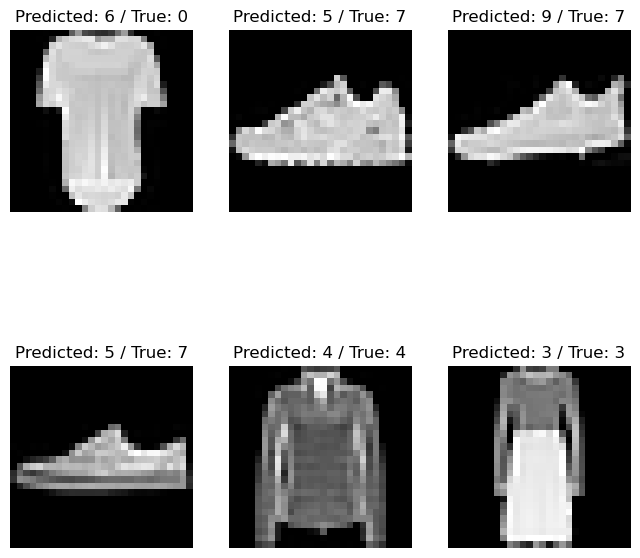

In [93]:
with torch.inference_mode():
    tinyvgg.eval()
    idx = torch.randint(0, len(train_dataset), size=[6])
    X = train_dataset.data[idx]
    _X = X.view(6, 1, 28, -1).type(torch.float)
    y = train_dataset.targets[idx]

    y_pred = tinyvgg(_X)
    y_pred = torch.argmax(y_pred, dim=-1)

    fig, axs = plt.subplots(2, 3, figsize=(8, 8))
    index = 0
    for i in range(2):
        for j in range(3):
            axs[i, j].imshow(X[index], cmap = 'gray')
            axs[i, j].set_title(f'Predicted: {y_pred[index]} / True: {y[index]}')
            axs[i, j].axis('off')
            index += 1
    plt.show()

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [95]:
from sklearn.metrics import confusion_matrix
with torch.inference_mode():
    tinyvgg.eval()
    test_loader = DataLoader(
        dataset = test_dataset,
        batch_size=len(test_dataset),
        shuffle = False
    )
    X_test, y_test = next(iter(test_loader))

    y_pred = tinyvgg(X_test)
    y_pred = torch.argmax(y_pred, dim = -1)

    cm = confusion_matrix(y_test, y_pred)
    print(cm)

[[899   0  18  23   4   1  49   0   6   0]
 [  1 968   1  22   3   0   4   0   1   0]
 [ 18   0 792  10 116   0  60   0   4   0]
 [ 19   4  13 922  22   0  20   0   0   0]
 [  0   0  39  32 884   0  45   0   0   0]
 [  0   0   0   0   0 980   0  16   0   4]
 [186   1  44  33  90   0 639   0   7   0]
 [  0   0   0   0   0   8   0 975   0  17]
 [  3   1   3   2   4   1   9   5 972   0]
 [  0   0   0   0   0   6   1  29   0 964]]


<Axes: >

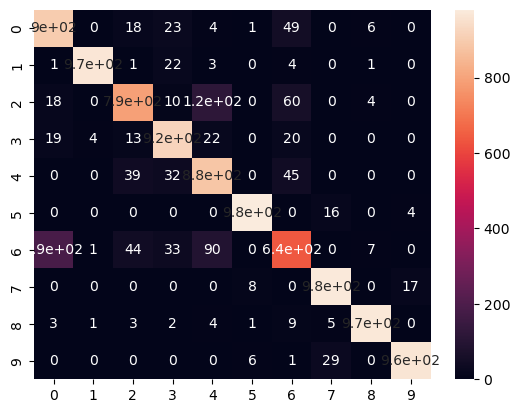

In [97]:
import seaborn as sns
sns.heatmap(cm, annot=Tr)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [7]:
from torch import nn 
import torch 
import matplotlib.pyplot as plt
image = torch.rand((1,3,64,64))
kernels = [1,2,3,4,5,6,7,8,9,10]
for k in kernels:
    conv = nn.Conv2d(3, 2, k, 1)
    print(conv(image).shape)

torch.Size([1, 2, 64, 64])
torch.Size([1, 2, 63, 63])
torch.Size([1, 2, 62, 62])
torch.Size([1, 2, 61, 61])
torch.Size([1, 2, 60, 60])
torch.Size([1, 2, 59, 59])
torch.Size([1, 2, 58, 58])
torch.Size([1, 2, 57, 57])
torch.Size([1, 2, 56, 56])
torch.Size([1, 2, 55, 55])
